In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"D:\Github\Data-Science-And-Machine-Learning-Course\Datasets\placement.csv")

In [3]:
dataset.head(3)

,cgpa,score,package,placement
0,6.89,4.349952,3.26,1
1,5.12,6.609859,1.98,0
2,7.82,9.401520,3.25,1


In [24]:
X = dataset.drop(columns=["placement", "package"])
y = dataset["placement"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# help(train_test_split)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
dt.score(X_test, y_test)

0.4090909090909091

In [36]:
dt.predict([[7.82,9.401520]])

D:\Installations\Miniconda\envs\dsml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [37]:
from sklearn.tree import plot_tree

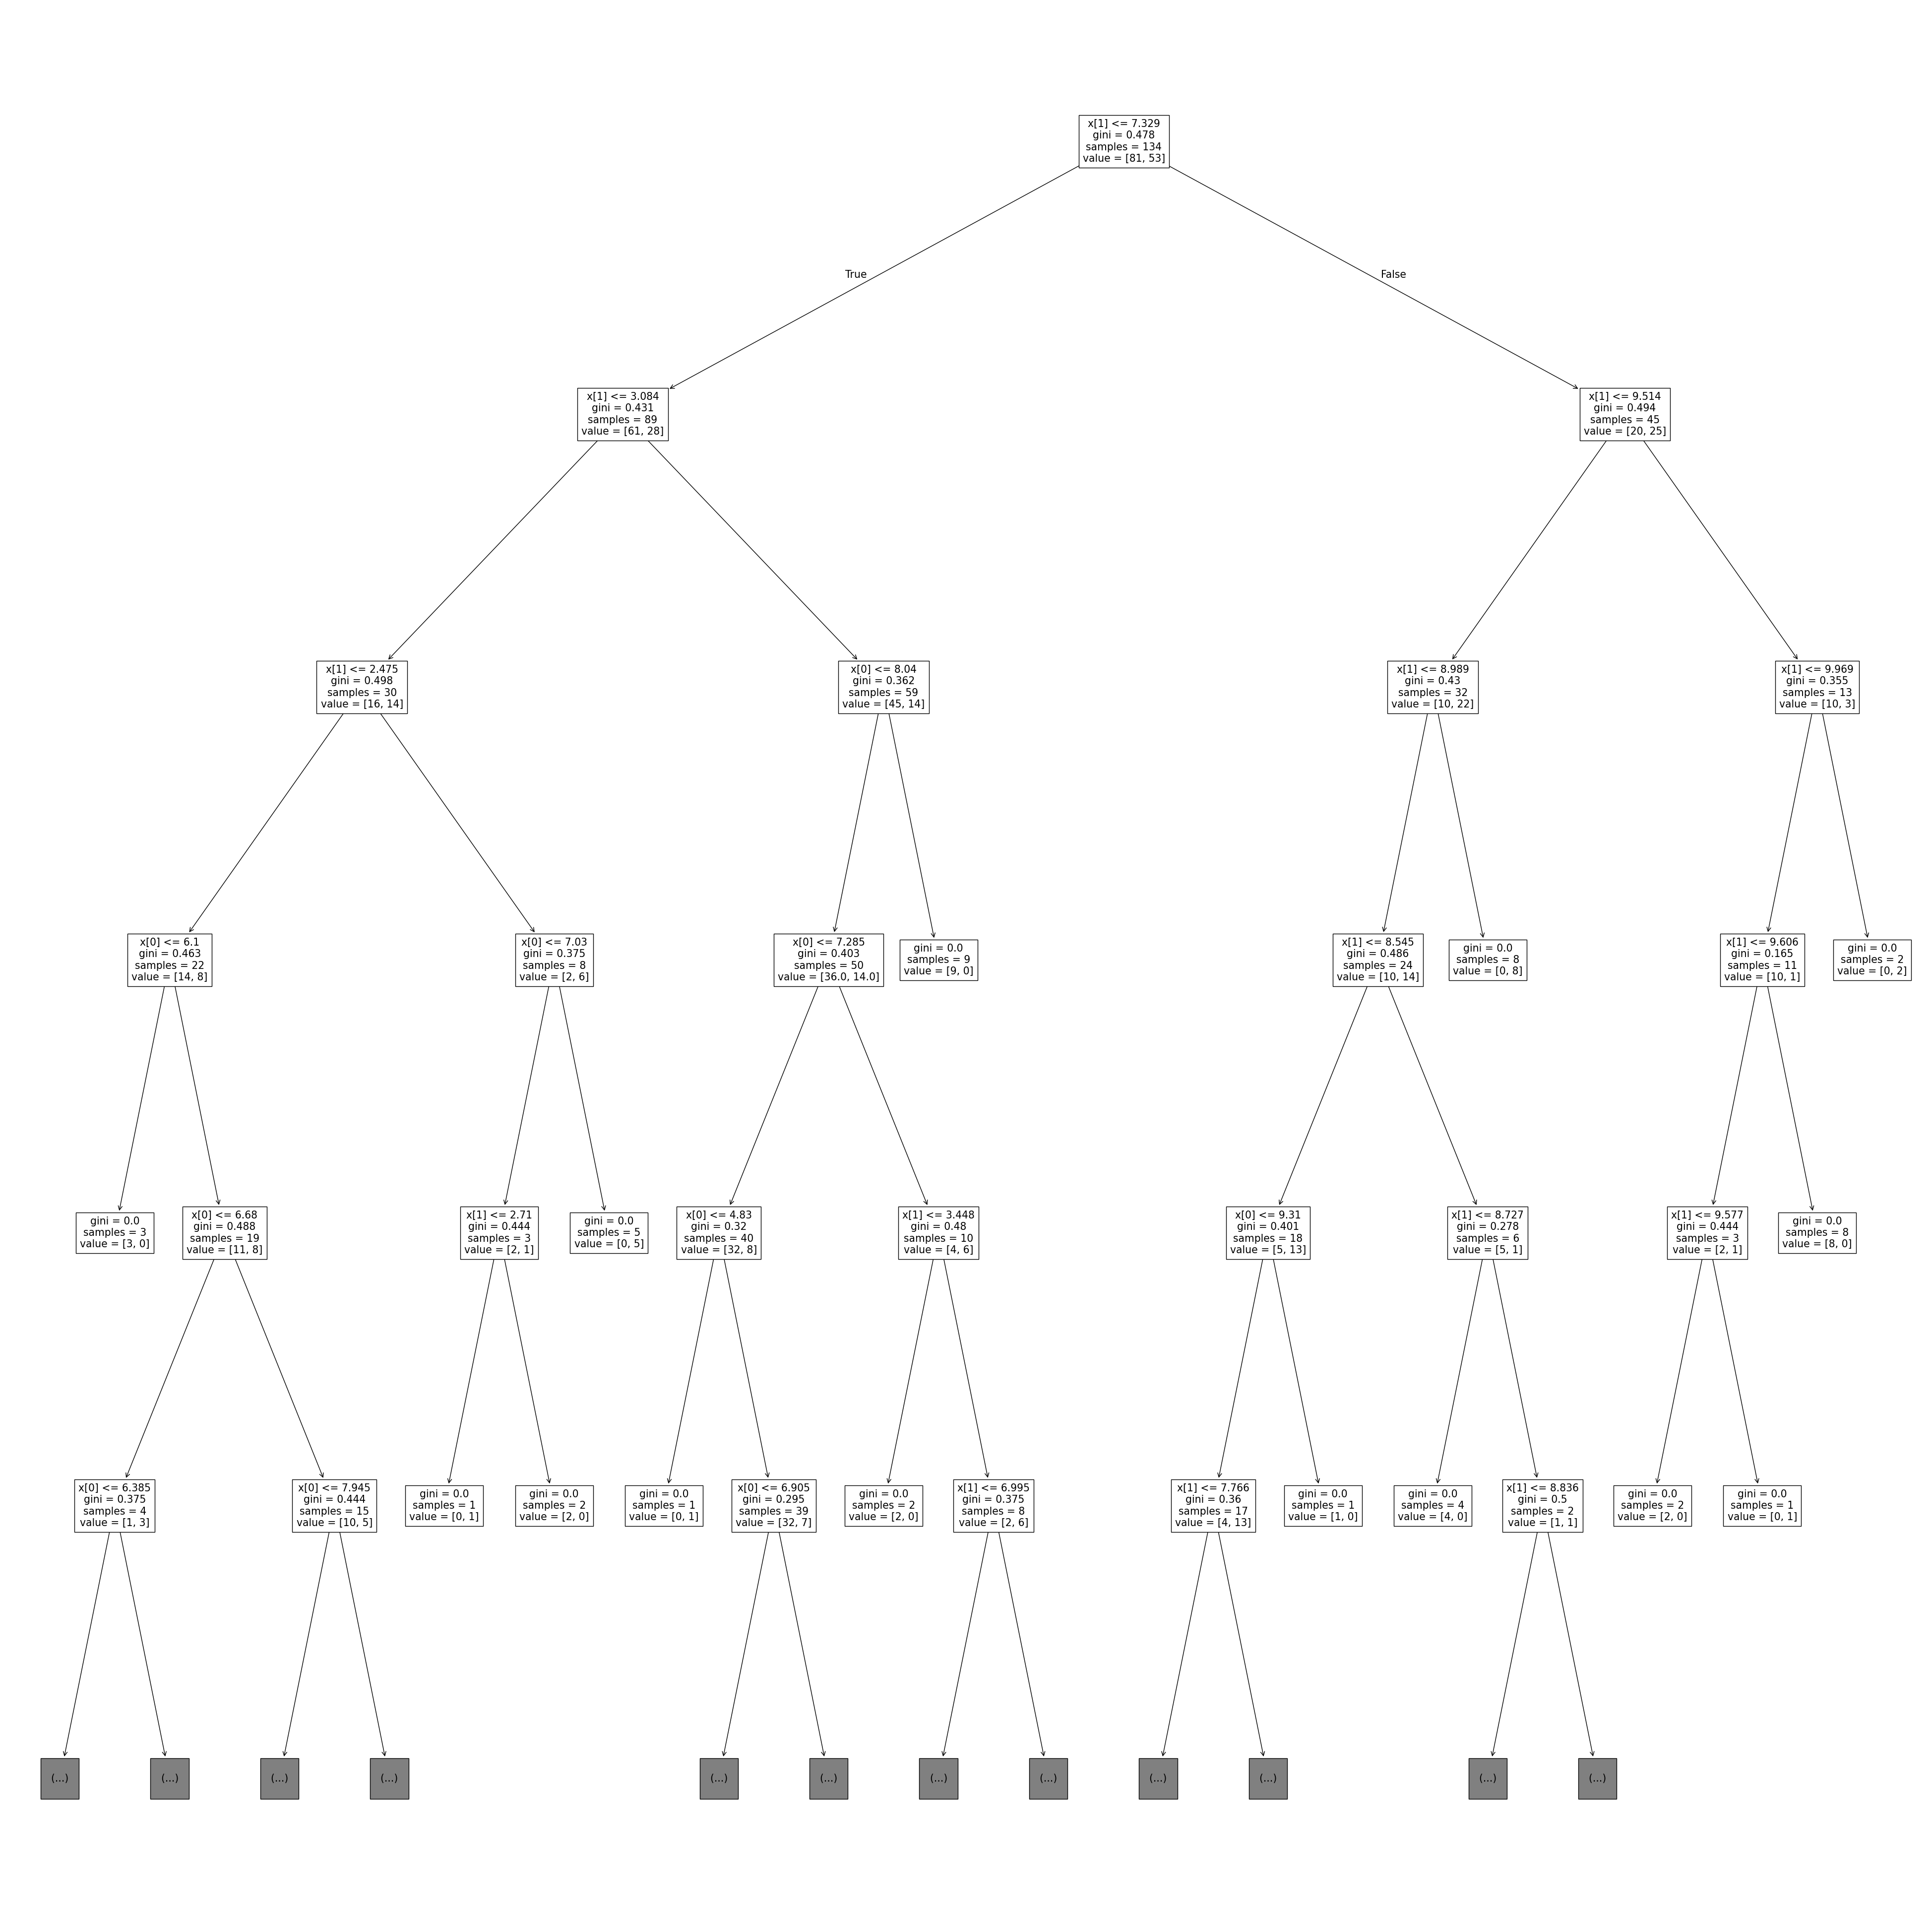

In [38]:
plt.figure(figsize=(50,50))
plot_tree(dt, max_depth=5)
plt.show()

### Criterion of decision tree

Criterion : {"gini", "entropy", "log_loss"}, default="gini"  
    The function to measure the quality of a split. Supported criteria are  
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the  
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

In [39]:
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
dt_log_loss = DecisionTreeClassifier(criterion="log_loss")
dt_log_loss.fit(X_train, y_train)

,criterion,'log_loss'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
print("Criterion gini score     : ", dt.score(X_test, y_test))
print("Criterion entropy score  : ", dt_entropy.score(X_test, y_test))
print("Criterion log_loss score : ", dt_log_loss.score(X_test, y_test))

Criterion gini score     :  0.4090909090909091
Criterion entropy score  :  0.4090909090909091
Criterion log_loss score :  0.45454545454545453


In [42]:
from mlxtend.plotting import plot_decision_regions

D:\Installations\Miniconda\envs\dsml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


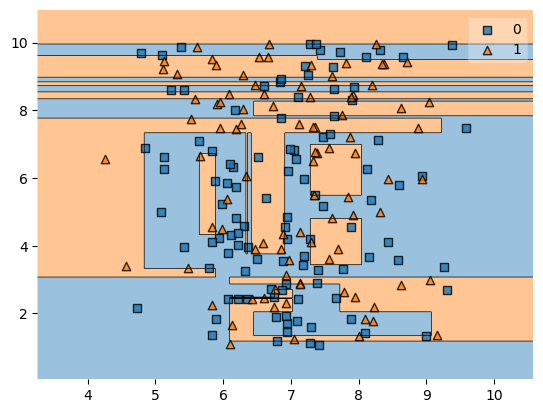

In [43]:
plot_decision_regions(X.to_numpy(), y.to_numpy(), clf=dt_log_loss)
plt.show()